# **The fifth in-class-exercise (40 points in total, 11/17/2022)**

(20 points) The purpose of the question is to practice different machine learning algorithms for text classification as well as the performance evaluation. In addition, you are requried to conduct *10 fold cross validation (https://scikit-learn.org/stable/modules/cross_validation.html)* in the training. 

The dataset can be download from canvas. The dataset contains two files train data and test data for sentiment analysis in IMDB review, it has two categories: 1 represents positive and 0 represents negative. You need to split the training data into training and validate data (80% for training and 20% for validation, https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6) and perform 10 fold cross validation while training the classifier. The final trained model was final evaluated on the test data. 

Algorithms:

(1) MultinominalNB

(2) SVM 

(3) KNN 

(4) Decision tree

(5) Random Forest

(6) XGBoost

Evaluation measurement:

(1) Accuracy

(2) Recall

(3) Precison 

(4) F-1 score

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
# Write your code here
import pandas as pd

data_train = pd.read_csv('/content/gdrive/My Drive/Assignment Nov 20/stsa-train.txt', sep = 'delimiter=', header= None, names=['reviews'])
data_train[['sentiment','reviews']] = data_train['reviews'].str.split(" ", 1, expand=True)

data_test = pd.read_csv('/content/gdrive/My Drive/Assignment Nov 20/stsa-test.txt', sep = 'delimiter=', header= None, names=['reviews'])
data_test[['sentiment','reviews']] = data_test['reviews'].str.split(" ", 1, expand=True)

print(data_train.head())
print()
print(data_test.head())

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


                                             reviews sentiment
0  a stirring , funny and finally transporting re...         1
1  apparently reassembled from the cutting-room f...         0
2  they presume their audience wo n't sit still f...         0
3  this is a visually stunning rumination on love...         1
4  jonathan parker 's bartleby should have been t...         1

                                             reviews sentiment
0     no movement , no yuks , not much of anything .         0
1  a gob of drivel so sickly sweet , even the eag...         0
2  gangs of new york is an unapologetic mess , wh...         0
3  we never really feel involved with the story ,...         0
4            this is one of polanski 's best films .         1


In [4]:
import nltk
import re
import string
nltk.download('stopwords')
nltk.download('wordnet')
stopword=nltk.corpus.stopwords.words('english')
from nltk.stem import WordNetLemmatizer
wl= WordNetLemmatizer()

def clean(review):
    review ="".join([word.lower() for word in review if word not in string.punctuation])
    review = re.sub("^\d+\s|\s\d+\s|\s\d+$", " ", review)
    tokens = re.split('\W+',review)
    review = [wl.lemmatize(word) for word in tokens if word not in stopword]
    return review

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [6]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(analyzer = clean)
x_tfidf = tfidf_vect.fit_transform(data_train['reviews'])

#print(X_tfidf.shape)

x_tfidf_df = pd.DataFrame(x_tfidf.toarray())
x_tfidf_df.columns = tfidf_vect.get_feature_names()
x_test_tfidf = tfidf_vect.transform(data_test['reviews'])

print(x_test_tfidf.shape)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


(1821, 13343)


In [9]:
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB

nb_model = MultinomialNB()

# Sampling the training set
x_train, x_test, y_train, y_test = train_test_split(x_tfidf_df, data_train['sentiment'].values,
                                                test_size=0.2, random_state=42)

# Model fit using .fit()
nb_model.fit(x_train,y_train)
y_pred_nb = nb_model.predict(x_test)

print('Accuracy %s' % round(accuracy_score(y_test, y_pred_nb), 2))
print(classification_report(y_test, y_pred_nb))

Accuracy 0.8
              precision    recall  f1-score   support

           0       0.85      0.70      0.77       671
           1       0.76      0.88      0.82       713

    accuracy                           0.80      1384
   macro avg       0.80      0.79      0.79      1384
weighted avg       0.80      0.80      0.79      1384



In [10]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(nb_model, x_test, y_test, cv=10)
print("NB model score: ", scores.mean())

NB model score:  0.7247054530288813


In [11]:
# KNN model

from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors = 8)

knn_model.fit(x_train,y_train)
y_pred_knn = knn_model.predict(x_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

Accuracy 0.7622832369942196
              precision    recall  f1-score   support

           0       0.73      0.81      0.77       671
           1       0.80      0.71      0.76       713

    accuracy                           0.76      1384
   macro avg       0.77      0.76      0.76      1384
weighted avg       0.77      0.76      0.76      1384



In [12]:
# Calculating cross-value score
from sklearn.model_selection import cross_val_score

knn_cv_scores = cross_val_score(knn_model, x_test, y_test, cv=10)
print("KNN cross validation score:", knn_cv_scores.mean())

KNN cross validation score: 0.6748670628714419


In [13]:
# Decision Tree

from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier()
dt_model.fit(x_train,y_train)

y_pred_dt = dt_model.predict(x_test)

print('Accuracy %s' % accuracy_score(y_pred_dt, y_test))
print(classification_report(y_test, y_pred_dt))

Accuracy 0.6567919075144508
              precision    recall  f1-score   support

           0       0.66      0.61      0.63       671
           1       0.66      0.70      0.68       713

    accuracy                           0.66      1384
   macro avg       0.66      0.66      0.66      1384
weighted avg       0.66      0.66      0.66      1384



In [14]:
# Calculating cross value score

dt_val_scores = cross_val_score(dt_model, x_test, y_test, cv=10)
print("Decision tree score:", dt_val_scores.mean())

Decision tree score: 0.5974611615055782


In [15]:
# Random Forest model

from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(x_train,y_train)

y_pred_rf = rf_model.predict(x_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test,y_pred_rf))

Accuracy 0.7391618497109826
              precision    recall  f1-score   support

           0       0.78      0.64      0.70       671
           1       0.71      0.83      0.77       713

    accuracy                           0.74      1384
   macro avg       0.75      0.74      0.74      1384
weighted avg       0.75      0.74      0.74      1384



In [16]:
# Random Forest - Calculate cross value score

rf_cv_cores = cross_val_score(rf_model, x_test, y_test, cv=10)
print("Random forest score", rf_cv_cores.mean())

Random forest score 0.6770201230320092


In [17]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [18]:
# XGBoost model

from xgboost import XGBClassifier

xgb_model = XGBClassifier()

xgb_model.fit(x_train,y_train)
y_pred_xgb = xgb_model.predict(x_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

Accuracy 0.6445086705202312
              precision    recall  f1-score   support

           0       0.75      0.40      0.52       671
           1       0.61      0.88      0.72       713

    accuracy                           0.64      1384
   macro avg       0.68      0.64      0.62      1384
weighted avg       0.68      0.64      0.62      1384



In [19]:
# XGBoost - Calculate cross value score

rf_cv_scores = cross_val_score(xgb_model, x_test, y_test, cv=10)
print("XGBoost score:", rf_cv_scores.mean())

XGBoost score: 0.6184704410384736


(20 points) The purpose of the question is to practice different machine learning algorithms for text clustering
Please downlad the dataset by using the following link.  https://www.kaggle.com/PromptCloudHQ/amazon-reviews-unlocked-mobile-phones
(You can also use different text data which you want)

Apply the listed clustering methods to the dataset:

K means, 
DBSCAN,
Hierarchical clustering. 

You can refer to of the codes from  the follwing link below. 
https://www.kaggle.com/karthik3890/text-clustering 

In [5]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [1]:
#Write your code here.

import pandas as pd
import nltk
from nltk.corpus import stopwords
from textblob import Word

amazon_data = pd.read_csv('/content/gdrive/My Drive/Assignment Nov 20/Amazon_Unlocked_Mobile.csv')
amazon_data = amazon_data.head(20000)
nltk.download('stopwords')
stop = stopwords.words('english')
nltk.download('wordnet')

amazon_data['Reviews'] = amazon_data['Reviews'].apply(lambda x: " ".join(x.lower() for x in str(x).split()))
amazon_data['Reviews'] = amazon_data['Reviews'].str.replace('[^\w\s]','')
amazon_data['Reviews'] = amazon_data['Reviews'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
amazon_data['Reviews'] = amazon_data['Reviews'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
amazon_data.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: The default value of regex will change from True to False in a future version.
  from ipykernel import kernelapp as app


,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,feel lucky found used phone u used hard phone ...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,nice phone nice grade pantach revue clean set ...,0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,work good go slow sometimes good phone love,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,great phone replace lost phone thing volume bu...,0.0


In [2]:
amazon_data.shape

(20000, 6)

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer()
tfidf_vectors = tfidf_vect.fit_transform(amazon_data['Reviews'].values.astype('U'))

names= tfidf_vect.get_feature_names()

#forming 9 clusters
from sklearn.cluster import KMeans

kmeans_model = KMeans(n_clusters = 9, random_state=50)
kmeans_model.fit(tfidf_vectors)


from collections import Counter
Counter(kmeans_model.labels_)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Counter({1: 6182,
         0: 8874,
         3: 850,
         5: 1149,
         8: 1090,
         6: 331,
         7: 368,
         4: 661,
         2: 495})

In [4]:
top_words = 7

centroids = kmeans_model.cluster_centers_.argsort()[:, ::-1]

for cluster_num in range(6):
    key_features = [names[i] for i in centroids[cluster_num, :top_words]]
    print('Cluster '+str(cluster_num+1))
    print('Top Words:', key_features)

Cluster 1
Top Words: ['work', 'iphone', 'good', 'product', 'like', 'new', 'great']
Cluster 2
Top Words: ['phone', 'work', 'new', 'great', 'good', 'one', 'like']
Cluster 3
Top Words: ['love', 'phone', 'great', 'wife', 'work', 'daughter', 'iphone']
Cluster 4
Top Words: ['good', 'product', 'phone', 'far', 'work', 'condition', 'buy']
Cluster 5
Top Words: ['nice', 'excelente', 'excelent', 'ok', 'phone', 'product', 'producto']
Cluster 6
Top Words: ['battery', 'charge', 'phone', 'hold', 'life', 'hour', 'last']


In [5]:
cluster_center = kmeans_model.cluster_centers_
cluster_center

array([[1.36206955e-04, 0.00000000e+00, 0.00000000e+00, ...,
        4.06396847e-05, 0.00000000e+00, 4.06396847e-05],
       [0.00000000e+00, 9.94215449e-05, 1.24947780e-05, ...,
        0.00000000e+00, 6.05956668e-05, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [6]:
reviews=[]
for i in amazon_data['Reviews']:
    reviews.append(str(i).split())

import gensim
w2v_model=gensim.models.Word2Vec(reviews, size=100, workers=4)

import numpy as np

vectors = []
for i in reviews:
    vector = np.zeros(100)
    count = 0
    for word in i:
        try:
            vec = w2v_model.wv[word]
            vector += vec
            count += 1
        except:
            pass
    vector /= count
    vectors.append(vector)

vectors = np.array(vectors)
vectors = np.nan_to_num(vectors)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in true_divide


In [7]:
from sklearn.cluster import DBSCAN

minPts = 2 * 100

# Lower bound function
def lower_bound(nums, target): 
    l, r = 0, len(nums) - 1
    # Binary searching
    while l <= r:
        mid = int(l + (r - l) / 2)
        if nums[mid] >= target:
            r = mid - 1
        else:
            l = mid + 1
    return l

def compute200thnearestneighbour(x, data): 
    dists = []
    for val in data:
      # computing distances
      dist = np.sum((x - val) **2 )

      if(len(dists) == 200 and dists[199] > dist):
          l = int(lower_bound(dists, dist))
          if l < 200 and l >= 0 and dists[l] > dist:
              dists[l] = dist
      else:
          dists.append(dist)
          dists.sort()

    # Dist 199 contains the distance of 200th nearest neighbour.    
    return dists[199]

vectors.shape

(20000, 100)

In [8]:
dist_200th = []

for val in vectors[:1000]:
    dist_200th.append( compute200thnearestneighbour(val, vectors[:1000]))

dist_200th.sort()

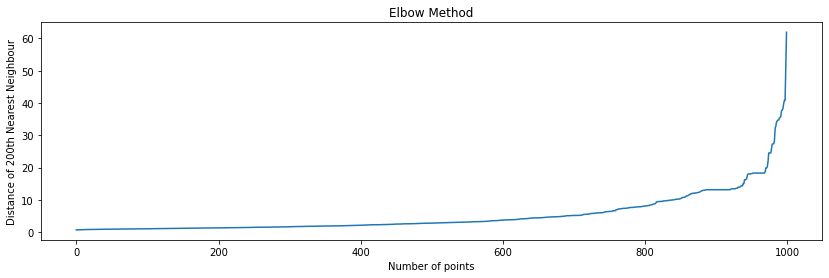

In [9]:
%matplotlib inline
from matplotlib import pyplot as plt

plt.figure(figsize=(14,4))

plt.title("Elbow Method")
plt.plot([x for x in range(len(dist_200th))], dist_200th)

plt.xlabel("Number of points")
plt.ylabel("Distance of 200th Nearest Neighbour")
plt.show()

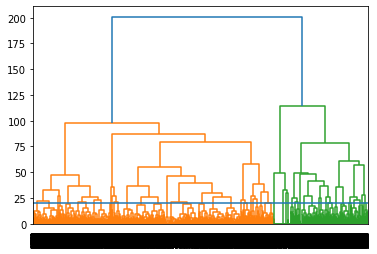

In [10]:
import scipy
from scipy.cluster import hierarchy

dendro = hierarchy.dendrogram(hierarchy.linkage(vectors, method='ward'))

plt.axhline(y=20)

In one paragraph, please compare K means, DBSCAN and Hierarchical clustering.

In [11]:
#You can write you answer here. (No code needed)

K-means clustering is based on the distance between the data points and the centroids of the clusters themselves.\
DBSCAN is used to perform clustering that is based on density.\
Here the areas where the points are concetrated the most are found and are segregated from empty space.\
Hierarchical clustering, as the name suggests involves clustering in layers. 
It begins with considering each data point as a seperate cluster and then finds the two clusters that are closer to each other.
